# Imports

In [1]:
#standard DS imports
import numpy as np
import pandas as pd

#visualizion imports
import matplotlib.pyplot as plt
import seaborn as sns

#wrangle file to grab and prepare
from wrangle import wrangle_curriculum

# Wrangling

In [4]:
# wrangle_curriculum takes a txt file that the user has downloaded from 
    #Google Drive and prepares it by separating columns by space, renaming all columns descriptively, 
    #engineering a datetime column and dropping old date and time columns, 
    #changing datetime column to datetime type, setting datetime to index,
    #engineering columns for each time attribute individually, filling nulls with zero for users
    #that have no cohort_id
df = wrangle_curriculum()
df

,lesson,user_id,cohort_id,ip,year,month,weekday,hour
datetime,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,2018,January,Friday,9
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2018,January,Friday,9
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2018,January,Friday,9
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018,January,Friday,9
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,2018,January,Friday,9
...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33,2021,April,Wednesday,16
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,2021,April,Wednesday,16
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,2021,April,Wednesday,16


## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [5]:
df = df.assign(lesson_code=lambda x: x.groupby(['lesson']).ngroup())

In [6]:
df.lesson_code.value_counts()

lesson_code
7       50312
2096    19519
1794    18983
2280    18297
1767    13733
        ...  
182         1
185         1
370         1
401         1
1013        1
Name: count, Length: 2314, dtype: int64

In [7]:
df.lesson.value_counts()

lesson
/                                                               50312
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii                                                        13733
                                                                ...  
12-distributed-ml/6.1-prepare-part-1                                1
12-distributed-ml/6.4-prepare-part-4                                1
4-python                                                            1
4-python/overview                                                   1
appendix/professional-development/post-interview-review-form        1
Name: count, Length: 2314, dtype: int64

In [8]:
# Homepage is /
df[df.lesson_code==7]

,lesson,user_id,cohort_id,ip,year,month,weekday,hour,lesson_code
datetime,,,,,,,,,
2018-01-26 10:00:37,/,6,22.0,97.105.19.61,2018,January,Friday,10,7
2018-01-26 10:14:47,/,11,1.0,97.105.19.61,2018,January,Friday,10,7
2018-01-26 10:14:53,/,6,22.0,97.105.19.61,2018,January,Friday,10,7
2018-01-26 10:18:22,/,10,21.0,97.105.19.61,2018,January,Friday,10,7
2018-01-26 10:35:28,/,15,21.0,97.105.19.61,2018,January,Friday,10,7
...,...,...,...,...,...,...,...,...,...
2021-04-21 15:32:26,/,875,135.0,24.242.150.231,2021,April,Wednesday,15,7
2021-04-21 15:41:45,/,887,135.0,107.77.169.13,2021,April,Wednesday,15,7
2021-04-21 16:01:11,/,841,133.0,99.162.244.233,2021,April,Wednesday,16,7


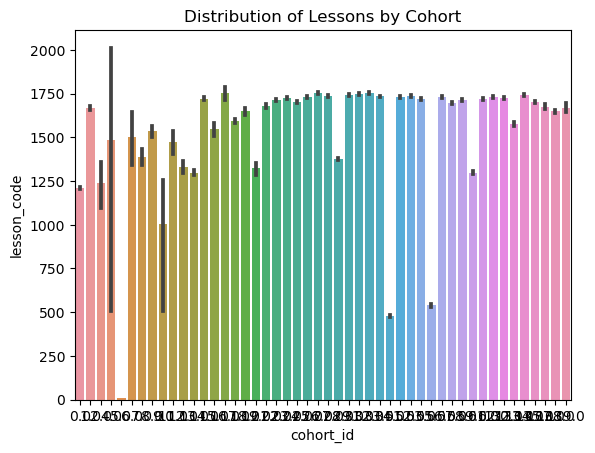

In [9]:
sns.barplot(x='cohort_id', y='lesson_code', data=df)
plt.title('Distribution of Lessons by Cohort')
plt.show()

## The most common lesson across cohorts is search/search_index.json (the most visited page is the homepage)

# 2. Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?

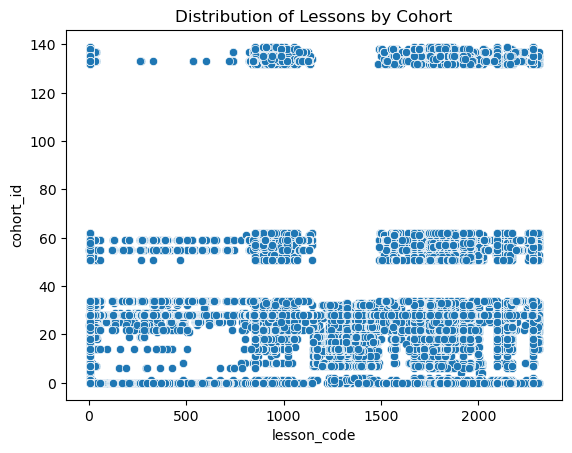

In [11]:
sns.scatterplot(x='lesson_code', y='cohort_id', data=df)
plt.title('Distribution of Lessons by Cohort')
plt.show()

In [12]:
# Dropping homepage
df = df[df.lesson_code != 7]
df.lesson_code.value_counts()

lesson_code
2096    19519
1794    18983
2280    18297
1767    13733
1668    13635
        ...  
182         1
185         1
370         1
401         1
1013        1
Name: count, Length: 2313, dtype: int64

In [13]:
# Making df to show count for each cohort visiting a lesson
bb_df = (df.groupby(['lesson_code', 'cohort_id']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   .drop_duplicates(subset='cohort_id'))
bb_df

,lesson_code,cohort_id,count
0,2096,0.0,1985
1,2280,62.0,1866
2,1794,28.0,1817
3,2096,56.0,1497
4,2280,29.0,1465
7,2096,33.0,1380
9,2280,53.0,1293
13,1093,59.0,1109
14,2096,57.0,1095
16,2280,58.0,1022


In [14]:
bb_df.lesson_code.value_counts()

lesson_code
2280    10
1794     9
2096     6
2148     3
1243     3
1720     2
1767     1
1415     1
1840     1
1668     1
1744     1
1321     1
1098     1
1815     1
506      1
1632     1
36       1
1911     1
1093     1
2016     1
Name: count, dtype: int64

## Checking all lessons that were highly visited by one cohort, but glossed over by others. Looking for high disperity between top visiting cohort and second highest cohort for each lesson with only 1 cohort that visited it the most compared to other lessons

In [15]:
df[df.lesson_code==1767].shape

(13733, 9)

## Nearly twice as many

In [16]:
df[df.lesson_code==1767]['cohort_id'].value_counts()

cohort_id
28.0     1393
62.0      795
53.0      786
24.0      770
29.0      753
22.0      732
58.0      701
33.0      682
56.0      663
57.0      651
0.0       567
51.0      523
26.0      497
32.0      472
132.0     456
52.0      451
31.0      433
23.0      412
27.0      351
25.0      337
61.0      324
134.0     259
14.0      224
1.0       153
21.0      105
8.0        57
18.0       45
135.0      40
16.0       29
17.0       25
15.0       13
138.0       9
13.0        8
11.0        5
34.0        4
6.0         3
19.0        3
12.0        1
139.0       1
Name: count, dtype: int64

In [17]:
df[df.lesson_code==1415].shape

(46, 9)

## Not significantly more

In [18]:
df[df.lesson_code==1415]['cohort_id'].value_counts()

cohort_id
17.0    12
13.0     8
22.0     8
2.0      6
15.0     4
19.0     2
14.0     2
23.0     2
18.0     1
25.0     1
Name: count, dtype: int64

In [19]:
df[df.lesson_code==1840].shape

(4669, 9)

## Not sig more

In [20]:
df[df.lesson_code==1840]['cohort_id'].value_counts()

cohort_id
29.0     313
33.0     276
28.0     243
53.0     228
22.0     223
24.0     210
26.0     209
32.0     207
56.0     206
25.0     203
57.0     198
62.0     195
23.0     193
0.0      177
51.0     176
58.0     171
27.0     169
134.0    165
31.0     161
52.0     153
132.0    151
135.0    111
61.0     100
1.0       68
17.0      50
21.0      33
14.0      24
18.0      22
6.0       10
8.0        6
138.0      5
16.0       4
15.0       2
13.0       2
19.0       2
7.0        2
2.0        1
Name: count, dtype: int64

In [21]:
df[df.lesson_code==1668].shape

(13635, 9)

## Not as many as first, but still significant

In [22]:
df[df.lesson_code==1668]['cohort_id'].value_counts()

cohort_id
28.0     1284
62.0      784
51.0      773
33.0      766
56.0      738
29.0      675
26.0      597
53.0      585
23.0      562
24.0      528
0.0       508
57.0      504
132.0     495
135.0     479
32.0      457
58.0      439
25.0      411
27.0      384
31.0      375
52.0      353
138.0     313
134.0     307
61.0      265
22.0      241
1.0       215
14.0      174
21.0      168
17.0       69
18.0       56
139.0      21
7.0        21
8.0        21
34.0       16
11.0       12
19.0       12
13.0       10
16.0        6
12.0        5
15.0        3
2.0         2
6.0         1
Name: count, dtype: int64

In [23]:
df[df.lesson_code==1744].shape

(10865, 9)

## Not sig more

In [24]:
df[df.lesson_code==1744]['cohort_id'].value_counts()

cohort_id
28.0     855
24.0     641
29.0     605
56.0     590
53.0     555
33.0     526
22.0     522
57.0     515
62.0     503
58.0     489
26.0     484
32.0     482
51.0     460
132.0    408
25.0     406
0.0      398
23.0     377
31.0     338
52.0     326
27.0     249
61.0     213
134.0    172
14.0     138
1.0      132
21.0     126
17.0      76
135.0     62
18.0      54
8.0       46
13.0      20
15.0      19
16.0      18
138.0     17
19.0      14
7.0        8
34.0       7
11.0       5
139.0      4
6.0        3
2.0        1
12.0       1
Name: count, dtype: int64

In [25]:
df[df.lesson_code==1321].shape

(261, 9)

## Our biggest diseperity yet, over twice as many from cohort 13

In [26]:
df[df.lesson_code==1321]['cohort_id'].value_counts()

cohort_id
13.0    83
19.0    38
17.0    31
1.0     23
28.0    23
14.0    21
22.0     6
18.0     6
23.0     5
12.0     5
0.0      3
7.0      3
11.0     3
24.0     2
2.0      2
31.0     2
21.0     1
25.0     1
8.0      1
26.0     1
33.0     1
Name: count, dtype: int64

In [27]:
df[df.lesson_code==1098].shape

(2302, 9)

## Not sig more

In [28]:
df[df.lesson_code==1098]['cohort_id'].value_counts()

cohort_id
59.0     943
28.0     707
133.0    463
55.0      96
137.0     60
34.0      28
0.0        4
22.0       1
Name: count, dtype: int64

In [29]:
df[df.lesson_code==1815].shape

(5132, 9)

## Not sig more

In [30]:
df[df.lesson_code==1815]['cohort_id'].value_counts()

cohort_id
33.0     290
32.0     282
135.0    269
62.0     241
29.0     237
25.0     222
52.0     213
138.0    209
26.0     209
53.0     208
24.0     206
56.0     200
58.0     198
23.0     195
31.0     194
51.0     193
57.0     189
28.0     187
139.0    179
0.0      175
132.0    171
27.0     140
134.0    129
22.0     109
61.0      92
1.0       53
17.0      43
14.0      38
21.0      23
7.0       18
18.0       8
19.0       7
13.0       2
16.0       1
8.0        1
11.0       1
Name: count, dtype: int64

In [31]:
df[df.lesson_code==506].shape

(1813, 9)

## Not sig more

In [32]:
df[df.lesson_code==506]['cohort_id'].value_counts()

cohort_id
28.0    645
55.0    595
34.0    521
0.0      36
59.0      8
22.0      3
32.0      2
14.0      1
21.0      1
33.0      1
Name: count, dtype: int64

In [33]:
df[df.lesson_code==1632].shape

(1917, 9)

## Not sig more

In [34]:
df[df.lesson_code==1632]['cohort_id'].value_counts()

cohort_id
137.0    627
28.0     467
133.0    379
59.0     308
55.0     100
34.0      24
22.0       6
0.0        5
51.0       1
Name: count, dtype: int64

In [35]:
df[df.lesson_code==36].shape

(2176, 9)

In [36]:
## Not sig more

In [37]:
df[df.lesson_code==36]['cohort_id'].value_counts()

cohort_id
34.0     650
59.0     470
55.0     467
28.0     455
137.0     61
0.0       26
32.0       9
33.0       7
7.0        7
133.0      7
21.0       5
24.0       3
23.0       3
22.0       2
19.0       2
31.0       1
14.0       1
Name: count, dtype: int64

In [38]:
df[df.lesson_code==1911].shape

(1910, 9)

## Not sig more

In [39]:
df[df.lesson_code==1911]['cohort_id'].value_counts()

cohort_id
23.0    721
22.0    595
24.0    245
21.0    168
1.0      56
0.0      44
14.0     18
25.0     18
8.0      15
18.0     14
19.0      8
13.0      2
16.0      2
4.0       1
17.0      1
15.0      1
34.0      1
Name: count, dtype: int64

In [40]:
df[df.lesson_code==1093].shape

(2641, 9)

## Not sig more

In [41]:
df[df.lesson_code==1093]['cohort_id'].value_counts()

cohort_id
59.0     1109
28.0      851
133.0     445
55.0      136
137.0      60
34.0       35
0.0         4
22.0        1
Name: count, dtype: int64

In [42]:
df[df.lesson_code==2016].shape

(2, 9)

## Not sig more

In [44]:
df[df.lesson_code==2016]['cohort_id'].value_counts()

cohort_id
4.0    1
8.0    1
Name: count, dtype: int64

In [45]:
df[df.lesson_code==1321]

,lesson,user_id,cohort_id,ip,year,month,weekday,hour,lesson_code
datetime,,,,,,,,,
2018-01-30 11:37:47,content/laravel/intro,68,13.0,216.1.153.162,2018,January,Tuesday,11,1321
2018-01-30 11:38:33,content/laravel/intro,68,13.0,216.1.153.162,2018,January,Tuesday,11,1321
2018-01-30 12:45:50,content/laravel/intro,69,14.0,192.171.117.210,2018,January,Tuesday,12,1321
2018-01-30 12:55:56,content/laravel/intro,69,14.0,192.171.117.210,2018,January,Tuesday,12,1321
2018-01-30 13:07:27,content/laravel/intro,69,14.0,192.171.117.210,2018,January,Tuesday,13,1321
...,...,...,...,...,...,...,...,...,...
2021-02-26 09:39:42,content/laravel/intro,139,14.0,174.25.169.61,2021,February,Friday,9,1321
2021-03-02 00:37:01,content/laravel/intro,430,28.0,67.11.120.84,2021,March,Tuesday,0,1321
2021-03-31 13:26:35,content/laravel/intro,210,17.0,71.238.72.160,2021,March,Wednesday,13,1321


## Cohort number 13 refers to content/laravel/intro (lesson code 1321) more than others. With low overall visits and cohort 13 doubling visits of cohort with second most visits, it seems other cohorts glossed over it and cohort 13 reffered to it more often

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


In [46]:
lowest = df.user_id.value_counts().tail()
lowest

user_id
593    1
165    1
652    1
574    1
212    1
Name: count, dtype: int64

## People should visit lessons once a day (150ish times) over their time at codeup if they don't drop out. Let's look at students who stayed only, because people who didnt will not have many visits.

In [47]:
low_active = df.user_id.value_counts()[df.user_id.value_counts() > 150]
lowest = low_active.tail(10)
lowest

user_id
56     163
966    163
411    161
86     161
93     160
298    159
284    159
175    156
513    153
923    151
Name: count, dtype: int64

## DF using only the 10 least active students that opened at least 150 times

In [61]:
# DF using only the 10 least active students that opened at least 150 times
baby_df = df[(df.user_id==56) | (df.user_id==966) | (df.user_id==411) | (df.user_id==86) | (df.user_id==93) | (df.user_id==298) | (df.user_id==284) | (df.user_id==175) | (df.user_id==513) | (df.user_id==923)]
baby_df

,lesson,user_id,cohort_id,ip,year,month,weekday,hour,lesson_code
datetime,,,,,,,,,
2018-01-29 09:40:38,spring/fundamentals/relationships,56,21.0,97.105.19.61,2018,January,Monday,9,2161
2018-01-29 09:40:41,spring/fundamentals/form-model-binding,56,21.0,97.105.19.61,2018,January,Monday,9,2159
2018-01-29 09:40:44,spring/fundamentals/controllers,56,21.0,97.105.19.61,2018,January,Monday,9,2158
2018-01-29 09:40:48,spring,56,21.0,97.105.19.61,2018,January,Monday,9,2148
2018-01-29 12:31:31,java-iii,56,21.0,97.105.19.61,2018,January,Monday,12,1767
...,...,...,...,...,...,...,...,...,...
2021-04-21 10:15:09,javascript-i/introduction/operators,966,139.0,136.50.72.144,2021,April,Wednesday,10,1815
2021-04-21 10:27:32,javascript-i/introduction/variables,966,139.0,136.50.72.144,2021,April,Wednesday,10,1817
2021-04-21 10:28:10,javascript-i/introduction/operators,966,139.0,136.50.72.144,2021,April,Wednesday,10,1815


In [49]:
baby_df.lesson.value_counts()

lesson
html-css                                                                     62
javascript-i/javascript-with-html                                            55
javascript-i/introduction/working-with-data-types-operators-and-variables    53
javascript-i/introduction/operators                                          53
javascript-i/introduction/primitive-types                                    53
                                                                             ..
java-i/syntax-types-and-variables                                             1
slides/jsp_and_jstl                                                           1
slides/mvc                                                                    1
slides/sessions_and_cookies                                                   1
appendix/further-reading/javascript/hoisting                                  1
Name: count, Length: 226, dtype: int64

In [50]:
baby_df.cohort_id.value_counts()

cohort_id
21.0     319
139.0    163
0.0      161
32.0     161
13.0     160
22.0     159
27.0     159
138.0    151
28.0     124
7.0       29
Name: count, dtype: int64

In [51]:
baby_df.year.value_counts()

year
2018    729
2021    438
2019    308
2020    111
Name: count, dtype: int64

In [52]:
baby_df.weekday.value_counts()

weekday
Monday       355
Thursday     292
Friday       281
Wednesday    277
Tuesday      264
Sunday        90
Saturday      27
Name: count, dtype: int64

In [53]:
baby_df.hour.value_counts()

hour
9     188
15    179
14    164
10    147
16    142
11    127
12    104
13     93
21     68
8      65
17     55
20     54
22     50
19     30
23     29
2      19
18     14
3      14
1      13
4      10
7      10
0       6
6       3
5       2
Name: count, dtype: int64

## Yes, there are students who do not access the curriculum as often as others. Cohort number 21 in 2018 was most common for active students who accessed the curriculum minimally (bottom 10 students). These students were mostly accessing html-css and looked at the lessons most on Mondays and less every day after that. They also looked at the lessons the most at 9am (when class starts) and less as the day went on.

# 4. Which lessons are least accessed?

In [62]:
# Bottom 10 of lessons with over 100 views
no_low_lesson = df.lesson.value_counts()[df.lesson.value_counts() > 100]
no_low_lesson.tail(10)

lesson
2.00.05_Charts_PivotTables_Sparklines    108
13-advanced-topics/2-cross-validation    107
content/mysql/intro-to-mysql             107
content/javascript_ii                    106
12-distributed-ml/6-ml-with-spark        106
storytelling/creating-charts             105
appendix/angular/templating              105
3.5.0-clauses-overview                   103
8.1_Overview                             102
4-python/7.4.1-pandas-overview           102
Name: count, dtype: int64

## Above are the 10 least accessed lessons of lessons with over 100 views

# 5. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [55]:
df.cohort_id.value_counts()

cohort_id
28.0     77691
0.0      48434
33.0     39077
29.0     36298
62.0     35413
53.0     34864
24.0     33535
56.0     32222
57.0     32117
51.0     31421
22.0     29098
59.0     29035
58.0     28490
32.0     28401
23.0     26893
26.0     26825
52.0     26738
34.0     24571
25.0     24454
31.0     24185
132.0    22752
55.0     19870
27.0     19762
61.0     16941
134.0    16132
135.0    15698
133.0    13600
14.0      9462
1.0       8264
137.0     7978
21.0      6814
138.0     6804
17.0      4705
13.0      2626
18.0      2009
139.0     1541
8.0       1502
19.0      1086
16.0       718
15.0       658
7.0        547
12.0       294
11.0       234
2.0         76
6.0         68
9.0          4
4.0          3
Name: count, dtype: int64

## Cohort 0 is no cohort listed, which is probably alumni and staff, but this is where I will start looking for anything suspicious

In [56]:
# Df for no cohort
no_cohort_df = df[df.cohort_id == 0]
no_cohort_df

,lesson,user_id,cohort_id,ip,year,month,weekday,hour,lesson_code
datetime,,,,,,,,,
2018-01-26 16:46:24,spring/extra-features/form-validation,48,0.0,97.105.19.61,2018,January,Friday,16,2154
2018-01-26 18:32:17,mysql/relationships/joins,48,0.0,97.105.19.61,2018,January,Friday,18,1956
2018-01-26 18:32:33,mysql/tables,48,0.0,97.105.19.61,2018,January,Friday,18,1959
2018-01-26 18:32:37,mysql/databases,48,0.0,97.105.19.61,2018,January,Friday,18,1940
2018-01-26 18:32:43,mysql/relationships,48,0.0,97.105.19.61,2018,January,Friday,18,1954
...,...,...,...,...,...,...,...,...,...
2021-04-21 12:49:00,javascript-ii,717,0.0,136.50.102.126,2021,April,Wednesday,12,1837
2021-04-21 12:49:02,javascript-ii/es6,717,0.0,136.50.102.126,2021,April,Wednesday,12,1840
2021-04-21 12:51:27,javascript-ii/map-filter-reduce,717,0.0,136.50.102.126,2021,April,Wednesday,12,1841


In [57]:
no_cohort_df.hour.value_counts()

hour
9     6591
14    5135
11    4835
10    4387
15    4197
13    4099
16    3481
12    2959
8     2260
20    1470
21    1424
22    1343
17    1256
19    1108
18     977
23     800
0      517
7      445
1      431
2      228
5      190
6      136
4       93
3       72
Name: count, dtype: int64

In [58]:
no_cohort_df.weekday.value_counts()

weekday
Monday       9995
Thursday     9432
Tuesday      9181
Wednesday    8046
Friday       7185
Sunday       2644
Saturday     1951
Name: count, dtype: int64

In [59]:
# Df for the count of largest hour visited per weekday
lil_df = (no_cohort_df.groupby(['hour', 'weekday']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   .drop_duplicates(subset='weekday'))
lil_df

,hour,weekday,count
0,9,Thursday,1447
1,9,Monday,1444
3,9,Friday,1307
5,9,Tuesday,1197
7,9,Wednesday,1018
51,21,Sunday,234
60,18,Saturday,200


<Axes: xlabel='ip', ylabel='user_id'>

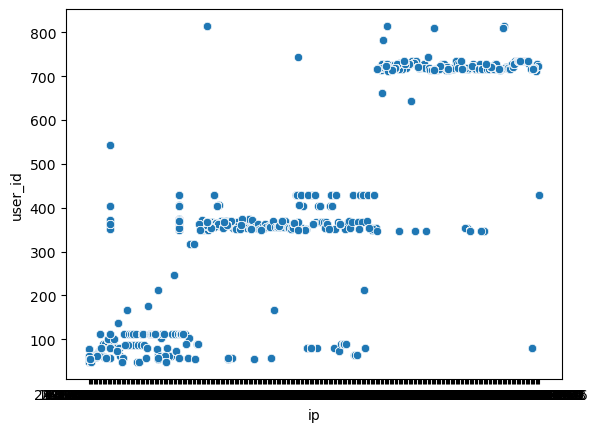

In [63]:
# distribution of ip by user id
sns.scatterplot(data=no_cohort_df, x='ip', y='user_id')

## I think it is suspicious that users with no cohort are accessing the lessons at high rates at midnight and even some at 3 or 4 in the morning. I looks like during the week the most common time for users without cohorts to access the lessons is 9am (when class starts), and because this is probably staff, this is not suspicious. You can see 3 very prominent groups of ip addresses for users with no cohort. I think the extreme outliers on the graph are suspicious.

# In Conclusion:
## The most common lesson across cohorts is search/search_index.json (the most visited page is the homepage). Cohort number 13 refers to content/laravel/intro (lesson code 1321) more than others. With low overall visits and cohort 13 doubling visits of cohort with second most visits, it seems other cohorts glossed over it and cohort 13 reffered to it more often. There are students who do not access the curriculum as often as others. Cohort number 21 in 2018 was most common for active students who accessed the curriculum minimally (bottom 10 students). These students were mostly accessing html-css and looked at the lessons most on Mondays and less every day after that. They also looked at the lessons the most at 9am (when class starts) and less as the day went on. I think it is suspicious that users with no cohort are accessing the lessons at high rates at midnight and even some at 3 or 4 in the morning. I looks like during the week the most common time for users without cohorts to access the lessons is 9am (when class starts), and because this is probably staff, this is not suspicious. You can see 3 very prominent groups of ip addresses for users with no cohort. I think the extreme outliers on the graph are suspicious.